In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
data = pd.read_csv("ftir_library.csv")
data.head()

,wavenumber,intensity,sample_name,group
0,667.3,0.000000,1,1
1,669.2,0.000000,1,1
2,671.1,0.000000,1,1
3,673.0,0.000000,1,1
4,675.0,0.003789,1,1


In [3]:
len(data)

1033852

In [4]:
data.dropna(subset=["wavenumber"])

,wavenumber,intensity,sample_name,group
0,667.3,0.000000,1,1
1,669.2,0.000000,1,1
2,671.1,0.000000,1,1
3,673.0,0.000000,1,1
4,675.0,0.003789,1,1
...,...,...,...,...
1033847,3992.1,0.000000,636,636
1033848,3994.0,0.000000,636,636
1033849,3996.0,0.000000,636,636
1033850,3997.9,0.000000,636,636


In [5]:
data = data[data["sample_name"]==data["group"]]

In [6]:
len(data)

1033852

In [7]:
data = data.drop(columns="group")

In [8]:
data.head()

,wavenumber,intensity,sample_name
0,667.3,0.000000,1
1,669.2,0.000000,1
2,671.1,0.000000,1
3,673.0,0.000000,1
4,675.0,0.003789,1


In [9]:
separate_data = dict(tuple(data.groupby('sample_name')))
# ftir = np.loadtxt("ftir_library.csv", delimiter=",", dtype=np.float32, skiprows=1)

In [10]:
type(separate_data[1])

pandas.core.frame.DataFrame

In [11]:
len(separate_data)

636

In [12]:
separate_data[100]

,wavenumber,intensity,sample_name
128700,667.3,0.065816,100
128701,669.2,0.058896,100
128702,671.1,0.063788,100
128703,673.0,0.071869,100
128704,675.0,0.053257,100
...,...,...,...
129995,3164.7,0.020407,100
129996,3166.6,0.024659,100
129997,3168.5,0.027168,100
129998,3170.5,0.035433,100


In [13]:
array1 = np.zeros((4000,1), dtype=float)
array1.shape

(4000, 1)

In [14]:
data_check1 = separate_data[1]

In [15]:
type(data_check1)

pandas.core.frame.DataFrame

In [16]:
data_check1.head()

,wavenumber,intensity,sample_name
0,667.3,0.000000,1
1,669.2,0.000000,1
2,671.1,0.000000,1
3,673.0,0.000000,1
4,675.0,0.003789,1


In [17]:
start_wave = int(data_check1["wavenumber"][0])
end_wave = int(data_check1["wavenumber"][len(data_check1)-1])
end_wave

3172

In [18]:
data_check1["intensity"][4]

0.0037894102528922

In [13]:
def interpolate(i, x1, x2, y1, y2):
    assert x1<=i<=x2, f"the value of {i} is outside {x1} and {x2}"
    val = y1 + (i-x1)*(y2-y1)/(x2-x1)
    return val

In [39]:
for i in range(start_wave+1, end_wave):
    df_sort = data_check1.iloc[(data_check1['wavenumber']-i).abs().argsort()[:2]]
    idx_list = df_sort.index.tolist()
    prev_wave = float(data_check1["wavenumber"][idx_list[0]])
    next_wave = float(data_check1["wavenumber"][idx_list[0]+1])

    prev_intensity = float(data_check1["intensity"][idx_list[0]])
    next_intensity = float(data_check1["intensity"][idx_list[0]+1])
    if prev_wave>i:
        prev_wave = float(data_check1["wavenumber"][idx_list[0]-1])
        next_wave = float(data_check1["wavenumber"][idx_list[0]])
        prev_intensity = float(data_check1["intensity"][idx_list[0]-1])
        next_intensity = float(data_check1["intensity"][idx_list[0]])
    array1[i] = interpolate(i,prev_wave, next_wave, prev_intensity, next_intensity)

if next_wave>end_wave:
    array1[end_wave] = interpolate(end_wave, prev_wave, next_wave, prev_intensity, 0)


In [42]:
array1[3171]

array([0.08082838])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251


KeyboardInterrupt: 

In [1]:
import pandas as pd
metadata = pd.read_csv("ftir_metadata.csv")

In [2]:
metadata.head()

,spectrum_identity,spectrum_id,organization,spectrum_type,instrument_used,spectral_resolution,number_of_accumulations,material_form,color,instrument_mode,...,laser_light_used,total_acquisition_time_s,data_processing_procedure,level_of_confidence_in_identification,smoother,baseline,range,time_stamp,sample_name,rsq
0,HDPE,HDPESample 1Beauty C,Chabuka et al. 2020,FTIR,ThermalNicolet Nexus 670 FT-IR,4/cm,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,HDPE,HDPESample 2Beauty C,Chabuka et al. 2020,FTIR,ThermalNicolet Nexus 670 FT-IR,4/cm,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,HDPE,HDPESample 3Beauty C,Chabuka et al. 2020,FTIR,ThermalNicolet Nexus 670 FT-IR,4/cm,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
3,HDPE,HDPESample 4Beauty C,Chabuka et al. 2020,FTIR,ThermalNicolet Nexus 670 FT-IR,4/cm,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
4,HDPE,HDPESample 5Beauty C,Chabuka et al. 2020,FTIR,ThermalNicolet Nexus 670 FT-IR,4/cm,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN


In [3]:
len(metadata)

636

In [16]:
metadata["spectrum_identity"].unique()

array(['HDPE', 'PET', '1 2 polybutadiene',
       'acrylonitrile butadiene styrene', 'fibre acetate',
       'acrylonitrile butadiene', 'algae desmarestia viridis',
       'algae fucus serratus', 'algae laminaria digita and hyperborea',
       'algae laminaria sacharina', 'alginic acid  sodium salt',
       'fur alpaca', 'polyethylene wax oxidized', 'polyethylene wax',
       'fur angora rabbit', 'broodcomb', 'amber', 'polyester epoxide',
       'epoxide resin', 'polyester', 'polyhydroxybutyric acid',
       'butyl methacrylate isobutyl methacrolate', 'fur camel',
       'wool cashmere crossbred', 'wool cashmere kasakhstan',
       'wool cashmere mongolia', 'fur cat european shorthair',
       'cellulose', 'cellulose acetate', 'cellulose acetate butyrate',
       'cellulose triacetate', 'cellulose propionate',
       'chitin crangon antonia', 'chitin from crustacean shells',
       'chitin cancer pagurus', 'fibre cocoanut', 'copolyamide',
       'copolyester', 'fibre cotton combers', '

In [17]:
substring0 = "poly"
substring1 = "Poly"
substring2 = "low"
substring3 = "ethylene"
LDPE_metadata = metadata[metadata["spectrum_identity"].str.contains(substring0, case=False)]
LDPE_metadata.head()

,spectrum_identity,spectrum_id,organization,spectrum_type,instrument_used,spectral_resolution,number_of_accumulations,material_form,color,instrument_mode,...,laser_light_used,total_acquisition_time_s,data_processing_procedure,level_of_confidence_in_identification,smoother,baseline,range,time_stamp,sample_name,rsq
272,1 2 polybutadiene,1Primpke,Primpke et al. 2018,FTIR,NaN,NaN,NaN,beads,transparent,ATR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273,NaN
283,polyethylene wax oxidized,12Primpke,Primpke et al. 2018,FTIR,NaN,NaN,NaN,wax powder,white,ATR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284,NaN
284,polyethylene wax,13Primpke,Primpke et al. 2018,FTIR,NaN,NaN,NaN,wax powder,white,ATR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN
285,polyethylene wax,14Primpke,Primpke et al. 2018,FTIR,NaN,NaN,NaN,wax powder,white,ATR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286,NaN
289,polyester epoxide,18Primpke,Primpke et al. 2018,FTIR,NaN,NaN,NaN,powder,white,ATR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290,NaN


In [18]:
len(LDPE_metadata)

187

In [19]:
LDPE_metadata = LDPE_metadata[LDPE_metadata["spectrum_identity"].str.contains(substring1, case=False)]
len(LDPE_metadata)

187

In [20]:
LDPE_metadata = LDPE_metadata[LDPE_metadata["spectrum_identity"].str.contains(substring2, case=False)]
len(LDPE_metadata)

12

In [21]:
LDPE_metadata = LDPE_metadata[LDPE_metadata["spectrum_identity"].str.contains(substring3, case=False)]
len(LDPE_metadata)

12

In [22]:
substring0 = "poly"
substring1 = "Poly"
substring2 = "tere"
substring3 = "ethylene"
PET_metadata = metadata[metadata["spectrum_identity"].str.contains(substring2, case=False)]
len(PET_metadata)

13

In [23]:
PET_metadata["spectrum_identity"].unique()

array(['polytehylene terephthalate', 'polybuthylene terephthalate',
       'polytehylene terephthalate amorphous',
       'poly(butylene terephthalate)', 'poly(ethylene terephthalate)',
       'polyethylene terephtalate', 'polyethylene terephthalate',
       'poly(ethylene terepthalate)'], dtype=object)

In [24]:
PET_metadata1 = PET_metadata[PET_metadata["spectrum_identity"].str.contains("ehylene", case=False)]
len(PET_metadata1)

6

In [25]:
PET_metadata2 = PET_metadata[PET_metadata["spectrum_identity"].str.contains("ethylene", case=False)]
len(PET_metadata2)

4

In [26]:
PET_metadata3 = metadata[metadata["spectrum_identity"].str.contains("PET", case=False)]
len(PET_metadata3)

136

In [27]:
PET_metadata1["spectrum_identity"].unique()

array(['polytehylene terephthalate',
       'polytehylene terephthalate amorphous'], dtype=object)

In [28]:
PET_metadata = pd.concat([PET_metadata1, PET_metadata2, PET_metadata3], ignore_index=True)
len(PET_metadata)

146

In [29]:
substring0 = "prop"
PP_metadata = metadata[metadata["spectrum_identity"].str.contains(substring0, case=False)]

In [30]:
len(PP_metadata)

20

In [31]:
PP_metadata["spectrum_identity"].unique()

array(['cellulose propionate', 'ethylene propylene',
       'hydroxypropyl cellulose', 'hydroxypropyl methyl cellulose',
       'polypropylene',
       "poly(4 4' dipropoxy 2 2' diphenyl propane fumarate)",
       'fibre polypropylene', 'fibre polypropylene dyed',
       'polypropylene isotactic',
       'vinyl chloride vinyl acetate hydroxypropyl acrylate',
       'Pthalate and propyl alcohol mix',
       'Polypropylene  with silicate mix'], dtype=object)

In [32]:
PP_metadata = PP_metadata[PP_metadata["spectrum_identity"].str.contains("poly", case=False)]
len(PP_metadata)

14

In [33]:
PP_metadata["spectrum_identity"].unique()

array(['polypropylene',
       "poly(4 4' dipropoxy 2 2' diphenyl propane fumarate)",
       'fibre polypropylene', 'fibre polypropylene dyed',
       'polypropylene isotactic', 'Polypropylene  with silicate mix'],
      dtype=object)

In [34]:
PP_metadata = metadata[metadata["spectrum_identity"].str.contains("polypropylene", case=False)]
len(PP_metadata)

13

In [35]:
PP_metadata = PP_metadata[PP_metadata["spectrum_identity"].str.contains("fibre", case=False)==False]
len(PP_metadata)

11

In [36]:
PP_metadata = PP_metadata[PP_metadata["spectrum_identity"].str.contains("mix", case=False)==False]
len(PP_metadata)

10

In [37]:
HDPE_metadata1 = metadata[metadata["spectrum_identity"].str.contains("HDPE", case=False)]

In [38]:
len(HDPE_metadata1)

137

In [39]:
poly_metadata = metadata[metadata["spectrum_identity"].str.contains("poly", case=False)]
HDPE_metadata2 = poly_metadata[poly_metadata["spectrum_identity"].str.contains("high", case=False)]
len(HDPE_metadata2)

10

In [40]:
HDPE_metadata = pd.concat([HDPE_metadata1, HDPE_metadata2], ignore_index=True)

In [41]:
len(HDPE_metadata)

147

In [42]:
len(metadata)

636

In [43]:
other_metadata = metadata.merge(HDPE_metadata, how="left", indicator=True)
other_metadata = other_metadata[other_metadata["_merge"]=="left_only"]
print(len(other_metadata))
other_metadata = other_metadata.drop(columns="_merge")

other_metadata = other_metadata.merge(LDPE_metadata, how="left", indicator=True)
other_metadata = other_metadata[other_metadata["_merge"]=="left_only"]
print(len(other_metadata))
other_metadata = other_metadata.drop(columns="_merge")

other_metadata = other_metadata.merge(PET_metadata, how="left", indicator=True)
other_metadata = other_metadata[other_metadata["_merge"]=="left_only"]
print(len(other_metadata))
other_metadata = other_metadata.drop(columns="_merge")

other_metadata = other_metadata.merge(PP_metadata, how="left", indicator=True)
other_metadata = other_metadata[other_metadata["_merge"]=="left_only"]
print(len(other_metadata))
other_metadata = other_metadata.drop(columns="_merge")



489
477
331
321


In [44]:
other_metadata.tail()

,spectrum_identity,spectrum_id,organization,spectrum_type,instrument_used,spectral_resolution,number_of_accumulations,material_form,color,instrument_mode,...,laser_light_used,total_acquisition_time_s,data_processing_procedure,level_of_confidence_in_identification,smoother,baseline,range,time_stamp,sample_name,rsq
326,Polyether urethane with additives,47,"Suja Sukumaran, Thermo Fisher Scientific",FTIR,NaN,NaN,NaN,particle,grey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632,NaN
327,PMMA,48,"Suja Sukumaran, Thermo Fisher Scientific",FTIR,NaN,NaN,NaN,particle,white,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,633,NaN
328,Teflon/PTFE,5,"Suja Sukumaran, Thermo Fisher Scientific",FTIR,NaN,NaN,NaN,particle,clear/transparent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634,NaN
329,Styrofoam,6,"Suja Sukumaran, Thermo Fisher Scientific",FTIR,NaN,NaN,NaN,particle,white,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,635,NaN
330,silicone/PDMS,7,"Suja Sukumaran, Thermo Fisher Scientific",FTIR,NaN,NaN,NaN,particle,red,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636,NaN


In [45]:
other_metadata = other_metadata["sample_name"]
other_metadata.head()

0    273
1    274
2    275
3    276
4    277
Name: sample_name, dtype: int64

In [46]:
len(other_metadata)

321

In [47]:
other_metadata.dropna()

0      273
1      274
2      275
3      276
4      277
      ... 
326    632
327    633
328    634
329    635
330    636
Name: sample_name, Length: 321, dtype: int64

In [156]:
len(other_metadata)

321

In [157]:
len(HDPE_metadata)

147

In [158]:
len(LDPE_metadata)

12

In [159]:
len(PP_metadata)

10

In [160]:
len(PET_metadata)

146

In [161]:
other_metadata

0      273
1      274
2      275
3      276
4      277
      ... 
326    632
327    633
328    634
329    635
330    636
Name: sample_name, Length: 321, dtype: int64

In [162]:
i=0
for i in range(330):
    if i not in other_metadata:
        print(i)


98
124
201
202
217
218
219
220
222
285


In [119]:
other_metadata[98]

KeyError: 98

In [48]:
HDPE_metadata = HDPE_metadata["sample_name"].values.tolist()
LDPE_metadata = LDPE_metadata["sample_name"].values.tolist()
PET_metadata = PET_metadata["sample_name"].values.tolist()
PP_metadata = PP_metadata["sample_name"].values.tolist()

In [49]:
HDPE_metadata

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 349,
 355,
 356,
 357,
 392,
 489,
 540,
 541,
 542,
 583]

In [50]:
HDPE_metadata.tail()

AttributeError: 'list' object has no attribute 'tail'

In [51]:
PP_metadata

[377, 411, 496, 497, 512, 513, 514, 515, 517, 589]

In [52]:
LDPE_metadata

[384, 385, 386, 387, 388, 391, 484, 490, 534, 536, 537, 584]

In [53]:
PET_metadata

[367,
 368,
 404,
 437,
 438,
 439,
 454,
 492,
 587,
 613,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 614]

In [54]:
import os
save_path = "/home/aru/phd/side_work/edward/data"


In [55]:
i = 489
for i in PP_metadata:
    print(i)

377
411
496
497
512
513
514
515
517
589


In [56]:
separate_data[1]

,wavenumber,intensity,sample_name
0,667.3,0.000000,1
1,669.2,0.000000,1
2,671.1,0.000000,1
3,673.0,0.000000,1
4,675.0,0.003789,1
...,...,...,...
1295,3164.7,0.055735,1
1296,3166.6,0.062766,1
1297,3168.5,0.080317,1
1298,3170.5,0.080732,1


In [57]:
separate_data[2]["wavenumber"]

1300     667.3
1301     669.2
1302     671.1
1303     673.0
1304     675.0
         ...  
2595    3164.7
2596    3166.6
2597    3168.5
2598    3170.5
2599    3172.4
Name: wavenumber, Length: 1300, dtype: float64

In [66]:
key = 273
val = separate_data[key]



        wavenumber  intensity  sample_name
353600      3992.6   0.002979          273
353922      3990.7   0.002827          273
354244      3988.8   0.002679          273
354566      3986.8   0.002566          273
354888      3984.9   0.002507          273
...            ...        ...          ...
956388       408.9   0.001468          273
956710       407.0   0.001339          273
957032       405.0   0.001420          273
957354       403.1   0.001428          273
957676       401.2   0.001156          273

[1863 rows x 3 columns]
401 3992


In [122]:
df_sort = val.sort_values(by=["wavenumber"])
df_short

,wavenumber,intensity,sample_name
957676,401.2,0.001156,273
957354,403.1,0.001428,273
957032,405.0,0.001420,273
956710,407.0,0.001339,273
956388,408.9,0.001468,273
...,...,...,...
354888,3984.9,0.002507,273
354566,3986.8,0.002566,273
354244,3988.8,0.002679,273
353922,3990.7,0.002827,273


In [123]:
# print(val)
start_wave = int(df_short["wavenumber"].iloc[0])
end_wave = int(df_short["wavenumber"].iloc[len(val)-1])
idx_list = df_sort.index.tolist()
print(start_wave, end_wave)

401 3992


In [84]:
idx_list

[957676,
 957354,
 957032,
 956710,
 956388,
 956066,
 955744,
 955422,
 955100,
 954778,
 954456,
 954134,
 953812,
 953490,
 953168,
 952846,
 952524,
 952202,
 951880,
 951558,
 951236,
 950914,
 950592,
 950270,
 949948,
 949626,
 949304,
 948982,
 948660,
 948338,
 948016,
 947694,
 947372,
 947050,
 946728,
 946406,
 946084,
 945762,
 945440,
 945118,
 944796,
 944474,
 944152,
 943830,
 943508,
 943186,
 942864,
 942542,
 942220,
 941898,
 941576,
 941254,
 940932,
 940610,
 940288,
 939966,
 939644,
 939322,
 939000,
 938678,
 938356,
 938034,
 937712,
 937390,
 937068,
 936746,
 936424,
 936102,
 935780,
 935458,
 935136,
 934814,
 934492,
 934170,
 933848,
 933526,
 933204,
 932882,
 932560,
 932238,
 931916,
 931594,
 931272,
 930950,
 930628,
 930306,
 929984,
 929662,
 929340,
 929018,
 928696,
 928374,
 928052,
 927730,
 927408,
 927086,
 926764,
 926442,
 926120,
 925798,
 925476,
 925154,
 924832,
 924510,
 924188,
 923866,
 923544,
 923222,
 922900,
 922578,
 922256,
 

In [121]:
df_sort

,wavenumber,intensity,sample_name
957676,401.2,0.001156,273
957354,403.1,0.001428,273


In [119]:
(df_sort['wavenumber']-i).abs().argsort()

957676    1
957354    0
Name: wavenumber, dtype: int64

In [120]:
i

3991

In [129]:
for i in range(start_wave+1, end_wave):
    print(i)
    two_df_sort = df_sort.iloc[(df_sort['wavenumber']-i).abs().argsort()[:6]]
    two_df_sort = two_df_sort.sort_values(by=['wavenumber'])
    two_idx_list = two_df_sort.index.tolist()
#     print(two_df_sort)
#     print(two_idx_list)
    bo = False
    for j, idx in enumerate(two_idx_list):
        prev_wave_tem = float(df_sort["wavenumber"][idx])
        if prev_wave_tem<i:
            prev_wave = prev_wave_tem
            prev_intensity = float(df_sort["intensity"][idx])
            bo=True
            continue
        else:
            next_wave = prev_wave_tem
            next_intensity = float(df_sort["intensity"][idx])
            break

402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651


2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453


In [ ]:

    #     print(max(idx_list))
#     prev_wave = float(val["wavenumber"][idx_list[0]])
#     next_wave = float(val["wavenumber"][idx_list[0]+1])
# df_sort = val.iloc[(val['wavenumber']-i).abs().argsort()[:2]]
# idx_list = df_sort.index.tolist()

In [108]:
i=402
df_sort = val.iloc[(val['wavenumber']-i).abs().argsort()[:2]]

In [109]:
val['wavenumber']

353600    3992.6
353922    3990.7
354244    3988.8
354566    3986.8
354888    3984.9
           ...  
956388     408.9
956710     407.0
957032     405.0
957354     403.1
957676     401.2
Name: wavenumber, Length: 1863, dtype: float64

In [110]:
val['wavenumber']-i

353600    3590.6
353922    3588.7
354244    3586.8
354566    3584.8
354888    3582.9
           ...  
956388       6.9
956710       5.0
957032       3.0
957354       1.1
957676      -0.8
Name: wavenumber, Length: 1863, dtype: float64

In [114]:
(val['wavenumber']-i).abs().argsort()[-2:]

957354    1
957676    0
Name: wavenumber, dtype: int64

In [132]:
HDPE_name = 0
LDPE_name = 0
PET_name = 0
PP_name = 0
Other_name = 0
for key, val in separate_data.items():
    print(key)
#     if key < 271:
#         continue
    if key in HDPE_metadata:
        save_path_curr = os.path.join(save_path, "HDPE")
        save_name = f"{HDPE_name}.csv"
        HDPE_name+=1
    elif key in LDPE_metadata:
        save_path_curr = os.path.join(save_path, "LDPE")
        save_name = f"{LDPE_name}.csv"
        LDPE_name+=1
    elif key in PET_metadata:
        save_path_curr = os.path.join(save_path, "PET")
        save_name = f"{PET_name}.csv"
        PET_name+=1
    elif key in PP_metadata:
        save_path_curr = os.path.join(save_path, "PP")
        save_name = f"{PP_name}.csv"
        PP_name+=1
    else:
        save_path_curr = os.path.join(save_path, "other")
        save_name = f"{Other_name}.csv"
        Other_name+=1
        
    df_sort = val.sort_values(by=["wavenumber"])   
    start_wave = int(df_sort["wavenumber"].iloc[0])
    end_wave = int(df_sort["wavenumber"].iloc[len(df_sort)-1])
#     print(start_wave, end_wave)
#     if start_wave>end_wave:
#         a = start_wave
#         start_wave = end_wave
#         end_wave = a
    array1 = np.zeros((1,4000), dtype=float)

    for i in range(start_wave+1, end_wave):
        two_df_sort = df_sort.iloc[(df_sort['wavenumber']-i).abs().argsort()[:6]]
        two_df_sort = two_df_sort.sort_values(by=['wavenumber'])
        two_idx_list = two_df_sort.index.tolist()
        bo = False
        for j, idx in enumerate(two_idx_list):
            prev_wave_tem = float(df_sort["wavenumber"][idx])
            if prev_wave_tem<i:
                prev_wave = prev_wave_tem
                prev_intensity = float(df_sort["intensity"][idx])
                bo=True
                continue
            else:
                next_wave = prev_wave_tem
                next_intensity = float(df_sort["intensity"][idx])
                break
            
        if bo:
            pass
        else:
            print(f"sample {key} skipped because four closest is not below prev_wave")
            continue

        array1[0,i] = interpolate(i,prev_wave, next_wave, prev_intensity, next_intensity)

    if next_wave>end_wave:
        array1[0,end_wave] = interpolate(end_wave, prev_wave, next_wave, prev_intensity, 0)
    
    np.savetxt(os.path.join(save_path_curr, save_name), array1, delimiter=",")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [60]:
array1.shape

(4000, 1)

In [63]:
array1 = np.zeros((1,4000), dtype=float)

In [64]:
array1.shape

(1, 4000)

In [65]:
array1[0]=3

In [66]:
array1

array([[3., 3., 3., ..., 3., 3., 3.]])

In [1]:
import numpy as np
data = np.load("data/open_specy/ftir_baskaran_raw_x.npy")
data.shape

(96, 4000)

In [2]:
datay = np.load("data/open_specy/ftir_baskaran_raw_y.npy")
datay.shape

(96, 5)

In [3]:
data1 = np.load("data/open_specy/ftir_openspecy_raw_x.npy")
data1.shape

(626, 4000)

In [4]:
data1y = np.load("data/open_specy/ftir_openspecy_raw_y.npy")
data1y.shape

(626, 5)

In [5]:
import matplotlib.pyplot as plt

def plot(x):
    plt.plot(np.arange(4000), x)
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.title('Intensity vs. Wavelength')
    plt.show()


In [15]:
datay[0]

array([0., 1., 0., 0., 0.])

In [34]:
x = None
for i in range(len(data1y)):
    if data1y[i,0]==1:
        x = data1[i,:]
        break
print(x.shape)

(4000,)


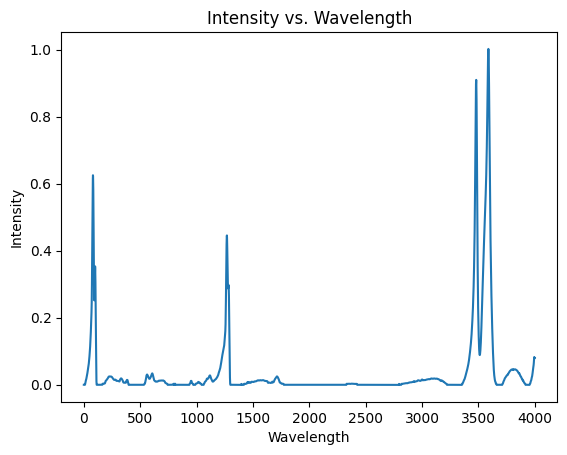

In [35]:
plot(x)

In [37]:
HDPE, LDPE, PET, PP, others = None, None, None, None, None
for i in range(len(data1y)):
    if data1y[i,0]==1:
        if HDPE is None:
            HDPE = data1[i,:]
        else:
            HDPE = np.vstack((HDPE, data1[i,:]))
    elif data1y[i,4]==1:
        if others is None:
            others = data1[i,:]
        else:
            others = np.vstack((others, data1[i,:]))
    elif data1y[i,1]==1:
        if LDPE is None:
            LDPE = data1[i,:]
        else:
            LDPE = np.vstack((LDPE, data1[i,:]))
    elif data1y[i,2]==1:
        if PET is None:
            PET = data1[i,:]
        else:
            PET = np.vstack((PET, data1[i,:]))
    elif data1y[i,3]==1:
        if PP is None:
            PP = data1[i,:]
        else:
            PP = np.vstack((PP, data1[i,:]))
    else:
        print("Why am I here")
for i in range(len(datay)):
    if datay[i,0]==1:
        if HDPE is None:
            HDPE = data[i,:]
        else:
            HDPE = np.vstack((HDPE, data[i,:]))
    elif datay[i,4]==1:
        if others is None:
            others = data[i,:]
        else:
            others = np.vstack((others, data[i,:]))
    elif datay[i,1]==1:
        if LDPE is None:
            LDPE = data[i,:]
        else:
            LDPE = np.vstack((LDPE, data[i,:]))
    elif datay[i,2]==1:
        if PET is None:
            PET = data[i,:]
        else:
            PET = np.vstack((PET, data[i,:]))
    elif datay[i,3]==1:
        if PP is None:
            PP = data[i,:]
        else:
            PP = np.vstack((PP, data[i,:]))
    else:
        print("Why am I here")
HDPE.shape
LDPE.shape
PET.shape
PP.shape
others.shape

(320, 4000)

In [38]:
print(HDPE.shape, LDPE.shape, PET.shape, PP.shape, others.shape)

(147, 4000) (41, 4000) (167, 4000) (47, 4000) (320, 4000)


In [39]:
np.save("data/open_specy/HDPE.npy", HDPE)
np.save("data/open_specy/LDPE.npy", LDPE)
np.save("data/open_specy/PET.npy", PET)
np.save("data/open_specy/PP.npy", PP)
np.save("data/open_specy/others.npy", others)

In [41]:
d = np.load("data/open_specy/HDPE.npy")
print(d.shape)
d = np.load("data/open_specy/LDPE.npy")
print(d.shape)
d = np.load("data/open_specy/PET.npy")
print(d.shape)
d = np.load("data/open_specy/PP.npy")
print(d.shape)
d = np.load("data/open_specy/others.npy")
print(d.shape)

(147, 4000)
(41, 4000)
(167, 4000)
(47, 4000)
(320, 4000)
